## 3-Generación aumentada de datos - Stack con normalización de valor máximo y filtro de fondo + Variación aleatoria del contraste y del brillo

In [79]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [34]:
# Ruta general
base_dir = 'Coleccion/'

#Sub rutas Modelos
m1 = base_dir + 'Disco_compresion__Carga_Lineal_3500N__100_frames__256_Resolucion/Imagenes/'
m2 = base_dir + 'Anillo_compresion__Carga_Lineal_3200N__100_frames__256_Resolucion/Imagenes/'
m3 = base_dir + 'Placa_Infinita__Carga_Lineal_7000N__100_frames__256_Resolucion/Imagenes/'
m4 = base_dir + 'Viga_distribuida__Carga_Lineal_3000N__100_frames__256_Resolucion/Imagenes/'
m5 = base_dir + 'Viga_puntual__Carga_Lineal_3000N__100_frames__256_Resolucion/Imagenes/'

# Sub Rutas iluminacion + camara
c = ['Concord_DCC3260C_No_correccion/',
 'Concord_exo304CU3_No_correccion/',
 'Concord_IMX250MYR_No_correccion/',
 'Concord_IMX250MZR_No_correccion/',
 'Concord_IMX253MZR_No_correccion/',
 'Concord_Ojo_Humano_No_correccion/',
 'Concord_PL_D755CU_No_correccion/',
 'DL11_DCC3260C_No_correccion/',
 'DL11_exo304CU3_No_correccion/',
 'DL11_IMX250MYR_No_correccion/',
 'DL11_IMX250MZR_No_correccion/',
 'DL11_IMX253MZR_No_correccion/',
 'DL11_Ojo_Humano_No_correccion/',
 'DL11_PL_D755CU_No_correccion/',
 'Fluorescente_DCC3260C_No_correccion/',
 'Fluorescente_exo304CU3_No_correccion/',
 'Fluorescente_IMX250MYR_No_correccion/',
 'Fluorescente_IMX250MZR_No_correccion/',
 'Fluorescente_IMX253MZR_No_correccion/',
 'Fluorescente_Ojo_Humano_No_correccion/',
 'Fluorescente_PL_D755CU_No_correccion/',
 'LCD_DCC3260C_No_correccion/',
 'LCD_exo304CU3_No_correccion/',
 'LCD_IMX250MYR_No_correccion/',
 'LCD_IMX250MZR_No_correccion/',
 'LCD_IMX253MZR_No_correccion/',
 'LCD_Ojo_Humano_No_correccion/',
 'LCD_PL_D755CU_No_correccion/',
 'Philips_DCC3260C_No_correccion/',
 'Philips_exo304CU3_No_correccion/',
 'Philips_IMX250MYR_No_correccion/',
 'Philips_IMX250MZR_No_correccion/',
 'Philips_IMX253MZR_No_correccion/',
 'Philips_Ojo_Humano_No_correccion/',
 'Philips_PL_D755CU_No_correccion/',
 'RXD2_DCC3260C_No_correccion/',
 'RXD2_exo304CU3_No_correccion/',
 'RXD2_IMX250MYR_No_correccion/',
 'RXD2_IMX250MZR_No_correccion/',
 'RXD2_IMX253MZR_No_correccion/',
 'RXD2_Ojo_Humano_No_correccion/',
 'RXD2_PL_D755CU_No_correccion/',
 'Sylvania_DCC3260C_No_correccion/',
 'Sylvania_exo304CU3_No_correccion/',
 'Sylvania_IMX250MYR_No_correccion/',
 'Sylvania_IMX250MZR_No_correccion/',
 'Sylvania_IMX253MZR_No_correccion/',
 'Sylvania_Ojo_Humano_No_correccion/',
 'Sylvania_PL_D755CU_No_correccion/',
 'Toshiba_DCC3260C_No_correccion/',
 'Toshiba_exo304CU3_No_correccion/',
 'Toshiba_IMX250MYR_No_correccion/',
 'Toshiba_IMX250MZR_No_correccion/',
 'Toshiba_IMX253MZR_No_correccion/',
 'Toshiba_Ojo_Humano_No_correccion/',
 'Toshiba_PL_D755CU_No_correccion/',
 'Willard_DCC3260C_No_correccion/',
 'Willard_exo304CU3_No_correccion/',
 'Willard_IMX250MYR_No_correccion/',
 'Willard_IMX250MZR_No_correccion/',
 'Willard_IMX253MZR_No_correccion/',
 'Willard_Ojo_Humano_No_correccion/',
 'Willard_PL_D755CU_No_correccion/']

# Sub Rutas imagenes originales
i1 = 'Img_1/'
i2 = 'Img_2/'
i3 = 'Img_3/'
i4 = 'Img_4/'

# Almacenamiento de stacks
folder = 'FilteredStack1234Aug'

mm = [m1, m2, m3, m4, m5]
ii = [i1, i2, i3, i4]

In [9]:
# Ruta general
base_dir = 'Coleccion/'

#Sub rutas Modelos
m1 = base_dir + 'Disco_compresion__Carga_Lineal_3500N__100_frames__256_Resolucion/Imagenes/'
m2 = base_dir + 'Anillo_compresion__Carga_Lineal_3200N__100_frames__256_Resolucion/Imagenes/'
m3 = base_dir + 'Placa_Infinita__Carga_Lineal_7000N__100_frames__256_Resolucion/Imagenes/'
m4 = base_dir + 'Viga_distribuida__Carga_Lineal_3000N__100_frames__256_Resolucion/Imagenes/'
m5 = base_dir + 'Viga_puntual__Carga_Lineal_3000N__100_frames__256_Resolucion/Imagenes/'
m6 = base_dir + 'Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/Imagenes/'
m7 = base_dir + 'Mensula__Carga_Lineal_100000N__100_frames__256_Resolucion/Imagenes/'
m8 = base_dir + 'Muesca__Carga_Lineal_3000000N__100_frames__256_Resolucion/Imagenes/'

# Sub Rutas iluminacion + camara

c = ['Concord_IMX250MYR_No_correccion/',
 'Concord_IMX250MZR_No_correccion/',
 'DL11_IMX250MYR_No_correccion/',
 'DL11_IMX250MZR_No_correccion/',
 'Fluorescente_IMX250MYR_No_correccion/',
 'Fluorescente_IMX250MZR_No_correccion/',
 'LCD_IMX250MYR_No_correccion/',
 'LCD_IMX250MZR_No_correccion/',
 'Philips_IMX250MYR_No_correccion/',
 'Philips_IMX250MZR_No_correccion/',
 'RXD2_IMX250MYR_No_correccion/',
 'RXD2_IMX250MZR_No_correccion/',
 'Sylvania_IMX250MYR_No_correccion/',
 'Sylvania_IMX250MZR_No_correccion/',
 'Toshiba_IMX250MYR_No_correccion/',
 'Toshiba_IMX250MZR_No_correccion/',
 'Willard_IMX250MYR_No_correccion/',
 'Willard_IMX250MZR_No_correccion/']


cs = ['3', '4', '10', '11', '17', '18', '24', '25', '31', '32', '38', '39', '45', '46', '52', '53', '59', '60'] 

# Sub Rutas imagenes originales
i1 = 'Img_1/'
i2 = 'Img_2/'
i3 = 'Img_3/'
i4 = 'Img_4/'

# Almacenamiento de stacks
folder = 'FilteredStack1234Aug/FilteredStack'

mm = [m6, m7, m8]
ii = [i1, i2, i3, i4]

In [82]:
for m in mm:
    for n in c:
        path = os.path.join(m, n, folder)
        print (path)

Coleccion/Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/Imagenes/Concord_IMX250MYR_No_correccion/FilteredStack1234Aug/
Coleccion/Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/Imagenes/Concord_IMX250MZR_No_correccion/FilteredStack1234Aug/
Coleccion/Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/Imagenes/DL11_IMX250MYR_No_correccion/FilteredStack1234Aug/
Coleccion/Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/Imagenes/DL11_IMX250MZR_No_correccion/FilteredStack1234Aug/
Coleccion/Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/Imagenes/Fluorescente_IMX250MYR_No_correccion/FilteredStack1234Aug/
Coleccion/Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/Imagenes/Fluorescente_IMX250MZR_No_correccion/FilteredStack1234Aug/
Coleccion/Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/Imagenes/LCD_IMX250MYR_No_correccion/FilteredStack1234Aug/
Coleccion/Est

In [84]:
lista = []
for i in range (201, 301):
    lista.append(str(i))

In [90]:
for m in mm:
    for n in c:
        path = os.path.join(m, n, folder)
        for fname in os.listdir(path):
            for e in lista:
                if (e in fname):
                    os.remove(os.path.join(m, n, folder, fname))
                    print(fname)

FilteredStack1234Aug_M6_C1_1.npy
FilteredStack1234Aug_M6_C1_10.npy
FilteredStack1234Aug_M6_C1_100.npy
FilteredStack1234Aug_M6_C1_101.npy
FilteredStack1234Aug_M6_C1_102.npy
FilteredStack1234Aug_M6_C1_103.npy
FilteredStack1234Aug_M6_C1_104.npy
FilteredStack1234Aug_M6_C1_105.npy
FilteredStack1234Aug_M6_C1_106.npy
FilteredStack1234Aug_M6_C1_107.npy
FilteredStack1234Aug_M6_C1_108.npy
FilteredStack1234Aug_M6_C1_109.npy
FilteredStack1234Aug_M6_C1_11.npy
FilteredStack1234Aug_M6_C1_110.npy
FilteredStack1234Aug_M6_C1_111.npy
FilteredStack1234Aug_M6_C1_112.npy
FilteredStack1234Aug_M6_C1_113.npy
FilteredStack1234Aug_M6_C1_114.npy
FilteredStack1234Aug_M6_C1_115.npy
FilteredStack1234Aug_M6_C1_116.npy
FilteredStack1234Aug_M6_C1_117.npy
FilteredStack1234Aug_M6_C1_118.npy
FilteredStack1234Aug_M6_C1_119.npy
FilteredStack1234Aug_M6_C1_12.npy
FilteredStack1234Aug_M6_C1_120.npy
FilteredStack1234Aug_M6_C1_121.npy
FilteredStack1234Aug_M6_C1_122.npy
FilteredStack1234Aug_M6_C1_123.npy
FilteredStack1234Aug_M6_C

FileNotFoundError: [WinError 2] El sistema no puede encontrar el archivo especificado: 'Coleccion/Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/Imagenes/Concord_IMX250MYR_No_correccion/FilteredStack1234Aug/FilteredStack1234Aug_M6_C1_201.npy'

In [89]:
c

['Concord_IMX250MYR_No_correccion/',
 'Concord_IMX250MZR_No_correccion/',
 'DL11_IMX250MYR_No_correccion/',
 'DL11_IMX250MZR_No_correccion/',
 'Fluorescente_IMX250MYR_No_correccion/',
 'Fluorescente_IMX250MZR_No_correccion/',
 'LCD_IMX250MYR_No_correccion/',
 'LCD_IMX250MZR_No_correccion/',
 'Philips_IMX250MYR_No_correccion/',
 'Philips_IMX250MZR_No_correccion/',
 'RXD2_IMX250MYR_No_correccion/',
 'RXD2_IMX250MZR_No_correccion/',
 'Sylvania_IMX250MYR_No_correccion/',
 'Sylvania_IMX250MZR_No_correccion/',
 'Toshiba_IMX250MYR_No_correccion/',
 'Toshiba_IMX250MZR_No_correccion/',
 'Willard_IMX250MYR_No_correccion/',
 'Willard_IMX250MZR_No_correccion/']

In [14]:
def filtro_disco(url):
    a1 = cv2.imread(url)[:,:,1]
    for i in range(256):
        for j in range(256):
            if ((i-128)**2)+((j-128)**2) > (128)**2:
                a1[i,j] = 0    
    return a1

def filtro_anillo(url):
    a1 = cv2.imread(url)[:,:,1]
    for i in range(256):
        for j in range(256):
            value = ((i-128)**2)+((j-128)**2)
            if (value >= (126)**2) or (value < (64)**2):
                a1[i,j] = 0   
    return a1

def filtro_placa(url):
    a1 = cv2.imread(url)[:,:,1]
    for i in range(256):
        for j in range(256):
            value = ((i-128)**2)+((j-128)**2)
            if (value < (26)**2):
                a1[i,j] = 0   
    return a1

def filtro_viga(url):
    a1 = cv2.imread(url)[:,:,1]
    for i in range(256):
        for j in range(256):
            if (i < 96 or i > 159):
                a1[i,j] = 0   
    return a1

def filtro_vertical(url):
    a1 = cv2.imread(url)[:,:,1]
    for i in range(256):
        for j in range(256):
            if (j < 96 or j > 160):
                a1[i,j] = 0   
    return a1

def filtro_mensula(url):
    a1 = cv2.imread(url)[:,:,1]
    for i in range(256):
        for j in range(256):
            value = ((i)**2)+((j)**2)
            if (value >= (256)**2) or (value <= (128)**2):
                a1[i,j] = 0
    return a1

def filtro_muesca(url):
    a1 = cv2.imread(url)[:,:,1]
    for i in range(256): #filas
        for j in range(256): #columnas
            value1 = (j + 1.77*(i-130) - 126)
            value2 = (j - 1.67*(i-129) - 129)
            if (value1 < 0) and (value2 < 0):
                    a1[i,j] = 0
    return a1

def get_filtro(m, url):
    if 'Disco' in m:
        return filtro_disco(url)
    elif 'Anillo' in m:
        return filtro_anillo(url)
    elif 'Placa' in m:
        return filtro_placa(url)
    elif 'Viga' in m:
        return filtro_viga(url)
    elif 'Estructura' in m:
        return filtro_vertical(url)
    elif 'Mensula' in m:
        return filtro_mensula(url)
    elif 'Muesca' in m:
        return filtro_muesca(url)

In [55]:
def disk_filter(im):
    for k in range(3):
        for i in range(256):
            for j in range(256):
                if ((i-128)**2)+((j-128)**2) > (128)**2:
                    im[i,j,k] = 0
    im = im / 255
    return im

def ring_filter(im):
    for k in range(3):
        for i in range(256):
            for j in range(256):
                value = ((i-128)**2)+((j-128)**2)
                if (value >= (126)**2) or (value < (64)**2):
                    im[i,j,k] = 0
    im = im / 255
    return im

def plate_filter(im):
    for k in range(3):
        for i in range(256):
            for j in range(256):
                value = ((i-128)**2)+((j-128)**2)
                if (value < (26)**2):
                    im[i,j,k] = 0
    im = im / 255
    return im

def beam_filter(im):
    for k in range(3):
        for i in range(256):
            for j in range(256):
                if (i < 96 or i > 159):
                    im[i,j,k] = 0
    im = im / 255
    return im

def vertical_filter(im):
    for k in range(4):
        for i in range(256):
            for j in range(256):
                if (j < 96 or j > 160):
                    im[i,j,k] = 0 
    im = im / 255
    return im

def mensula_filter(im):
    for k in range(4):
        for i in range(256):
            for j in range(256):
                value = ((i)**2)+((j)**2)
                if (value >= (256)**2) or (value <= (128)**2):
                    im[i,j,k] = 0
    im = im / 255
    return im

def muesca_filter(im):
    for k in range(4):
        for i in range(256): #filas
            for j in range(256): #columnas
                value1 = (j + 1.77*(i-130) - 126)
                value2 = (j - 1.67*(i-129) - 129)
                if (value1 < 0) and (value2 < 0):
                        im[i,j,k] = 0
    im = im / 255
    return im

def get_filter(m, im):
    if 'Disco' in m:
        return disk_filter(im)
    elif 'Anillo' in m:
        return ring_filter(im)
    elif 'Placa' in m:
        return plate_filter(im)
    elif 'Viga' in m:
        return beam_filter(im)
    elif 'Vertical' in m:
        return vertical_filter(im)
    elif 'Mensula' in m:
        return mensula_filter(im)
    elif 'Muesca' in m:
        return muesca_filter(im)

In [57]:
img = m7 + c[2] + i1 + 'Img1_' + '100.bmp'
a1 = cv2.imread(img)[:,:,1]

In [58]:
m7

'Coleccion/Mensula__Carga_Lineal_100000N__100_frames__256_Resolucion/Imagenes/'

367.76513458394567 56.69668404807094


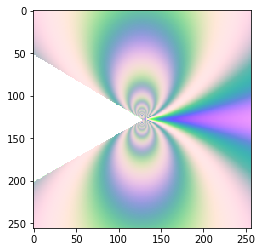

In [100]:
import random

## Normalización de la imagen a partir del valor máximo encontrado en el stack de mayor carga
m =  m8
ce = c[4]

b1 = get_filtro(m, m + ce + i1 + 'Img1_' + '100.bmp')    #Imagen 1
b2 = get_filtro(m, m + ce + i2 + 'Img2_' + '100.bmp')    #Imagen 2
b3 = get_filtro(m, m + ce + i3 + 'Img3_' + '100.bmp')    #Imagen 3
b4 = get_filtro(m, m + ce + i4 + 'Img4_' + '100.bmp')    #Imagen 4
b5 = np.dstack([b1, b2, b3, b4])
valor = np.amax(b5)

a1 = get_filtro(m, m + ce + i1 + 'Img1_' + '100.bmp')    #Imagen 1
a2 = get_filtro(m, m + ce + i2 + 'Img2_' + '100.bmp')    #Imagen 2
a3 = get_filtro(m, m + ce + i3 + 'Img3_' + '100.bmp')    #Imagen 3
a4 = get_filtro(m, m + ce + i4 + 'Img4_' + '100.bmp')    #Imagen 4
a5 = np.dstack([a1, a2, a3, a4])                     # Concatenación por medio de stack
a5 = a5/valor                                # Normalización por valor máximo

alpha = 255*random.uniform(1,3) # Contrast control (1.0-3.0)
beta = random.uniform(0,100) # Brightness control (0-100)

adjusted = cv2.convertScaleAbs(a5, alpha=alpha, beta=beta)
adjusted = get_filter(m, adjusted)

print(alpha, beta)
plt.imshow(adjusted, cmap='gray')
np.save(base_dir + 'muesca_brillo.npy', adjusted) #Guardar stack

In [93]:
ls

 El volumen de la unidad C no tiene etiqueta.
 El n£mero de serie del volumen es: 9287-81E1

 Directorio de C:\Users\Diego\Desktop\Tesis\Generador

01/08/2023  08:43 p. m.    <DIR>          .
01/08/2023  08:43 p. m.    <DIR>          ..
10/11/2022  05:41 p. m.    <DIR>          .ipynb_checkpoints
11/07/2023  12:58 a. m.         1.111.288 1-BackgroundFilter_Normalization4Aug.ipynb
08/07/2023  04:52 p. m.         1.376.559 1-Stokes.ipynb
11/07/2023  01:12 a. m.           463.796 2-RuidoGaussiano.ipynb
01/08/2023  08:43 p. m.            89.191 3-ContrasteBrillo.ipynb
09/11/2022  09:05 p. m.           261.117 4-PromedioCanales.ipynb
11/07/2023  12:46 a. m.           251.035 5-TransformacionesGeometricas.ipynb
22/02/2023  06:30 p. m.           154.428 6-CreacionDatasets.ipynb
11/11/2022  10:59 a. m.            18.630 7-CreacionDatasetValidacion.ipynb
29/06/2021  01:28 p. m.         1.216.949 A_pixelated_polarizer-based_camera_for_instantaneo.pdf
25/04/2022  11:10 p. m.           233.350 a1.

In the official OpenCV docs, it is suggested that this equation can be used to apply both contrast and brightness at the same time:

new_img = alpha*old_img + beta

where alpha corresponds to a contrast and beta is brightness. Different cases

alpha 1  beta 0      --> no change  
0 < alpha < 1        --> lower contrast  
alpha > 1            --> higher contrast  
-127 < beta < +127   --> good range for brightness values

In [15]:
adjusted.shape

(256, 256, 4)

In [26]:
import random
import cv2

for m in mm:                           #Recorrer cada uno de los 7 modelos
    for z in c:                        #Recorrer cada una de las 18 combinaciones de cámara e iluminación para cada modelo
        ## Normalización de la imagen a partir del valor máximo encontrado en el stack de mayor carga
        b1 = get_filtro(m, m + z + i1 + 'Img1_' + '100.bmp')    #Imagen 1
        b2 = get_filtro(m, m + z + i2 + 'Img2_' + '100.bmp')    #Imagen 2
        b3 = get_filtro(m, m + z + i3 + 'Img3_' + '100.bmp')    #Imagen 3
        b4 = get_filtro(m, m + z + i4 + 'Img4_' + '100.bmp')    #Imagen 4
        b5 = np.dstack([b1, b2, b3, b4])
        valor = np.amax(b5)
        
        for n in range(1,101):        #Recorrer cada una de las 100 imágenes de cada combinación, tomando el canal G del espacio RGB                
            i90 = get_filtro(m, m + z + i1 + 'Img1_' + str(n) + '.bmp')    #Imagen 1
            i45 = get_filtro(m, m + z + i2 + 'Img2_' + str(n) + '.bmp')    #Imagen 2
            i135 = get_filtro(m, m + z + i3 + 'Img3_' + str(n) + '.bmp')    #Imagen 3
            i0 = get_filtro(m, m + z + i4 + 'Img4_' + str(n) + '.bmp')    #Imagen 4
            #s0 = 0.5*(i0 + i90 + i45 + i135)
            #s1 = i0 - i90
            #s2 = i45 - i135
            #s = np.dstack([s0, s1, s2])                     # Concatenación por medio de stack
            a5 = np.dstack([i90, i45, i135, i0])
            a5 = a5/valor                                # Normalización por valor máximo
            alpha = 255*random.uniform(1,3) # Contrast control (1.0-3.0)
            beta = random.uniform(0,100) # Brightness control (0-100)
            adjusted = cv2.convertScaleAbs(a5, alpha=alpha, beta=beta)
            adjusted = get_filter(m, adjusted)
            np.save(m + z + 'FilteredStack1234Aug/' + 'FilteredStack1234Aug_M' + str(mm.index(m)+6) + '_C' + str(c.index(z)+1) +  '_' + str(200+n) + '.npy', adjusted) #Guardar stack
        print(m + z)

Coleccion/Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/Imagenes/Concord_IMX250MYR_No_correccion/
Coleccion/Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/Imagenes/Concord_IMX250MZR_No_correccion/
Coleccion/Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/Imagenes/DL11_IMX250MYR_No_correccion/
Coleccion/Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/Imagenes/DL11_IMX250MZR_No_correccion/
Coleccion/Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/Imagenes/Fluorescente_IMX250MYR_No_correccion/
Coleccion/Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/Imagenes/Fluorescente_IMX250MZR_No_correccion/
Coleccion/Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/Imagenes/LCD_IMX250MYR_No_correccion/
Coleccion/Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/Imagenes/LCD_IMX250MZR_No_correccion/
Coleccion/Estructura_Vertical__Carga_Lineal_

### Validación de generación correcta de imágenes

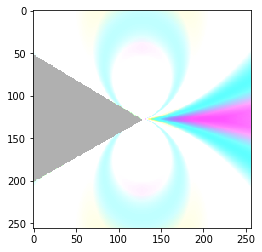

In [70]:
im = np.load(m8 + c[2] + 'FilteredStack1234Aug/' + 'FilteredStack1234Aug_M8' + '_C3' + '_' + str(300) + '.npy')
plt.imshow(im, cmap='gray')

In [72]:
im[150,50,3]

0.30980392156862746